<h2>Лабораторная работа №4</h2>
<h3>студента группы 6212</h3>
<h3>Зазвонова Ильи</h3>

Делаем необходимые импорты и объявляем константы

In [9]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem


ALF = [x for x in "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "]


PATH_TO_ANNOTATION = "c:\\Users\\Acer\\Documents\\py_lab_2\\annotations_2.csv"

Функция для создания датафрема по аннотации

In [10]:
def create_dataframe(annotation_path: str) -> pd.DataFrame:
    df = pd.DataFrame(columns=["Тип рецензии", "Текст рецензии", "Количество слов"])
    with open(annotation_path, mode="r", encoding="utf-8") as ann:
        for line in ann.readlines():
            line = line.split(",")
            with open(line[0], mode="r", encoding="utf-8") as file:
                film_name = file.readline().rstrip()
                text = "\n".join(file.readlines())
                row = pd.Series({'Тип рецензии': line[2].rstrip(),'Текст рецензии': text,'Количество слов': len(text.split(" "))}, name = film_name)
                df_new_row = pd.DataFrame([row], columns=df.columns)
                df = pd.concat([df, df_new_row])
    df.dropna()
    return df


df = create_dataframe(PATH_TO_ANNOTATION)
print(df)

     Тип рецензии                                     Текст рецензии  \
Тьма          bad  Вчера, наконец, досмотрела «Тьму». Сразу скажу...   
Тьма          bad  Я пишу данное ревью исключительно потому, что ...   
Тьма          bad  Не буду описывать содержание, нет смысла. Сраз...   
Тьма          bad  Никогда такого не было, и вот опять...\n\n\n\n...   
Тьма          bad  О данном сериале я услышал совсем недавно, и у...   
...           ...                                                ...   
1+1          good  Начну с того, что фильм у нас в стране показал...   
1+1          good  Легкость. Казалось бы, её не может быть ни у ч...   
1+1          good  Без всяких предисловий сразу скажу, что это хо...   
1+1          good  Большинство французский фильмов всегда наполне...   
1+1          good  Похоже, это один из самых добрых и человечных ...   

     Количество слов  
Тьма             667  
Тьма             625  
Тьма             527  
Тьма             337  
Тьма             817

Функция, вычисляющая статистические данные для числовых полей датафрейма  и функция группировки датафрейма с с вычислением максимального, минимального и среднего значения по количеству слов

In [11]:
def get_static_info(df: pd.DataFrame) -> pd.DataFrame:
    return df["Количество слов"].describe()


def stats_for_marks(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop('Текст рецензии', axis=1)
    df = df.groupby('Тип рецензии')

    df_max = df.max().values.tolist()
    df_min = df.min().values.tolist()
    df_mean = df.mean().values.tolist()

    df_max = sum(df_max, [])
    df_min = sum(df_min, [])
    df_mean = sum(df_mean, [])

    result = pd.DataFrame({'Тип рецензии': ['bad', 'good']})
    result["max"] = df_max
    result["min"] = df_min
    result["mean"] = df_mean
    
    return result


print(get_static_info(df))
stats_for_marks(df)

count     2000
unique     659
top        215
freq        15
Name: Количество слов, dtype: int64


,Тип рецензии,max,min,mean
0,bad,1617,34,369.247
1,good,999,24,329.530


Функции сортировки датафрейма по словам и по меткам

In [12]:
def sort_dataframe_by_word_count(df: pd.DataFrame, count: int) -> pd.DataFrame:
    return df[df["Количество слов"] <= count]


def sort_dataframe_by_mark(df: pd.DataFrame, mark: str) -> pd.DataFrame:
    return df[df["Тип рецензии"] == mark]


print(sort_dataframe_by_word_count(df, 300))
sort_dataframe_by_mark(df, "bad")

      Тип рецензии                                     Текст рецензии  \
Тьма           bad  Первые 2 сезона показались очень не плохими. Н...   
Тьма           bad  Я бы даже не советовала начинать смотреть этот...   
Тьма           bad  Даже не знаю, сможете ли вы выбрать что-то нас...   
Мумия          bad  Я бы назвала этот фильм вестерном в первую оче...   
Мумия          bad  Создатели фильма не ставили перед собой задачи...   
...            ...                                                ...   
1+1           good  К просмотру фильма «1+1» я подходил нехотя, хо...   
1+1           good  Удивительно трогательная и в тоже время смешна...   
1+1           good  Гуманизация семимильными шагами шагает по план...   
1+1           good  Боль иногда уходит, но мысли то остаются.\n\n\...   
1+1           good  Потрясающе. Пожалуй, это единственное слово, к...   

      Количество слов  
Тьма              291  
Тьма              268  
Тьма              262  
Мумия             219  
Мум

,Тип рецензии,Текст рецензии,Количество слов
Тьма,bad,"Вчера, наконец, досмотрела «Тьму». Сразу скажу...",667
Тьма,bad,"Я пишу данное ревью исключительно потому, что ...",625
Тьма,bad,"Не буду описывать содержание, нет смысла. Сраз...",527
Тьма,bad,"Никогда такого не было, и вот опять...\n\n\n\n...",337
Тьма,bad,"О данном сериале я услышал совсем недавно, и у...",817
...,...,...,...
Гордость и предубеждение,bad,По одному из спутниковых каналов недавно показ...,240
Гордость и предубеждение,bad,"'Гордость и тщеславие - разные вещи, хотя этим...",399
Гордость и предубеждение,bad,"Прочитав книгу, а затем уже посмотрев фильм 20...",259
Гордость и предубеждение,bad,И постигло меня большое разочарование... Ведь ...,432


Функция создания диаграммы частотного анализа слов со вспомогательными функциями

In [13]:
def list_to_dict(a: list, b: dict) -> dict:
    """Функция преобразования списка в словарь"""
    for i in a:
        if i in b.keys():
            b[i] +=1
        else:
            b[i] =1
    return b


def del_trash(text: str) -> str:
    res = ''
    for i in text:
        if i in ALF:
            res += i
    return res


def merge(a: dict, b: FreqDist) -> None:
    """Слияние словаря с FreqDist с изменением исходного словаря"""
    for key, value in b.items():
        if key in a.keys():
            a[key] += value
        else:
            a[key] = value


def dict_to_FreqDist(a: dict) -> FreqDist:
    """Преобразует словарь в FreqDist"""
    b = FreqDist()
    for key, value in a.items():
        b[key] = value
    return b



def process(text: str, m: Mystem, stopwords_ru: list, d: dict, n: int, nlp) -> None:
    """Здесь происходят основные вычисления функции get_hist"""
    text = del_trash(text)
    l = [word for word in m.lemmatize(text) if (word not in stopwords_ru) and nlp(word)[0].pos_ not in ["VERB", "NOUN"]]
    processed = FreqDist(nltk.Text(l)).most_common(n)
    merge(d, dict(processed))




In [37]:
def get_hist(df: pd.DataFrame, mark: str, n: int) -> pd.Series:
    d = FreqDist()
    m = Mystem()

    nlp = spacy.load("ru_core_news_md")

    stopwords_ru = set(stopwords.words("russian"))
    stopwords_ru = stopwords_ru | {'серия', 'фильм', 'сезон', 'сериал', 'который', 'первый', "второй", "персонаж", " ", '  '}
    stopwords_ru = stopwords_ru | {*tuple(nlp.Defaults.stop_words)}
    stopwords_ru = stopwords_ru | {word.lower() for word in df.index}
    

    i = 0

    for text in sort_dataframe_by_mark(df, mark)['Текст рецензии']:
        i+=1
        print(i)
        text = del_trash(text)
        l = [word for word in m.lemmatize(text) if (word not in stopwords_ru) and nlp(word)[0].pos_ not in ["VERB", "NOUN"]]
        merge(d, FreqDist(nltk.Text(l)))
        d = dict_to_FreqDist(dict(d.most_common(round(n))))
    return pd.Series(dict(d.most_common(n)))


hist = get_hist(df, "bad", 20)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


Функция, визуализирующая гистограмму

хороший       44
главный       38
третий        37
странный      34
сюжетный      31
интересный    27
русский       23
…             13
совершенно    11
постоянно     10
мрачный       10
крайне        10
четвертый      9
плохо          9
банальный      8
старший        7
ужасный        7
отличный       7
сложный        6
чистый         5
dtype: int64


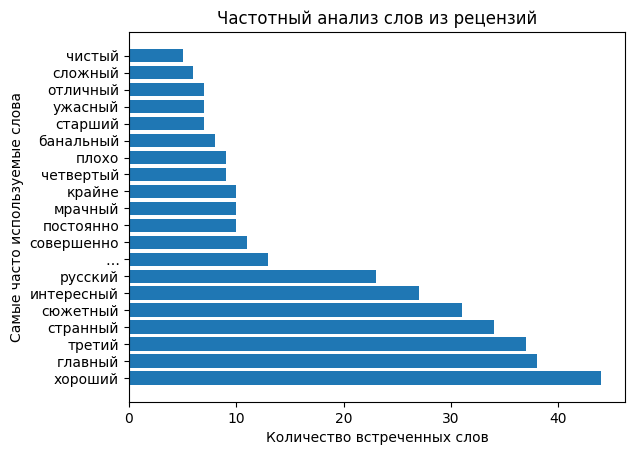

In [40]:
def show_barh(df: pd.Series) -> None:
    plt.barh(df.index, df.values)
    plt.xlabel("Количество встреченных слов")
    plt.ylabel("Самые часто используемые слова")
    plt.title("Частотный анализ слов из рецензий")
    plt.show()


show_barh(hist)